# آستانه گیری

آستانه گیری یکی از ساده ترین روش های تقسیم بندی تصویر است

در این روش میزان روشنایی هر پیکسل از تصویر با یک حد آستانه مقایسه میشود 

درصورتی که روشنایی پیکسل بالاتر از آستانه بود بارنگ سفید255 ودرغیر اینصورت بارنگ مشکی 0علامت گذاری میشود

 استفاده میشودROI آستانه گیری بیشتر روی تصاویر خاکستری وبه منظور ایجاد ماسک یا استخراج ناحیه مورد 

# آستانه گیری ساده

درآستانه گیری ساده هر پیکسل که بزرگ تر از حد آستانه باشد مقدار255وکوچکتر مقدار صفر میگیرد

thresh,dst = cv2.threshold(src,thresh,maxVal,type)

src = تصویر اصلی

thresh = پارامتر حد آستانه

maxVal =  قرارمیگیردmaxValاگر مقدار پیکسلی بیشتر از حد آستانه بود برابر 

type = نوع آستانه گیری را مشخص میکند(THRESH_BINARY,THRESH_BINARY_INV,THRESH_TRUNC,THRESH_TOZERO,THRESH_TOZERO_INV)

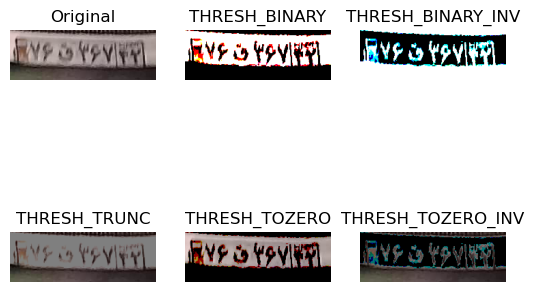

In [18]:
from matplotlib import pyplot as plt
import cv2

img = cv2 .imread("pelak2.png")
thresh,dst1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)
thresh,dst2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
thresh,dst3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
thresh,dst4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
thresh,dst5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

imgs = [img,dst1,dst2,dst3,dst4,dst5]
titles = ["Original","THRESH_BINARY","THRESH_BINARY_INV","THRESH_TRUNC","THRESH_TOZERO","THRESH_TOZERO_INV"]
for i in range(len(titles)):
    plt.subplot(2,3,i+1)
    plt.imshow(imgs[i])
    plt.title(titles[i])
    plt.axis("off")
plt.show()    

# پرچم های اوتسو ومثلثی

وارد کردن حد آستانه بصورت دستی مشکلی برای تابع به حساب می آید

THRESH_OTSU ,THRESH_TRIANGLEاین دوپرچم مقدارآستانه را بصورت خودکار محاسبه میکنند

در روش اوتسو حد آستانه بهینه،بین دو قله نمودار هیستوگرام فرض میشود(بین زمینه و پیش زمینه)

وقتی نمودار هیستوگرام یک قله داشته باشد از روش مثلثی استفاده میشود

بیشترین و کمترین قسمت نمودار هیستوگرام را با خط بهم وصل کرده نقطه ای روی نمودارکه از محور افق بیشترین فاصله با خط را دارد حد آستانه محسوب میشود

اضافه کنیدthreshold درتابع typeبرای استفاده از این پرچم ها کافی ست نام آنها را به کمک + به پارامتر 

127.0 133.0 35.0


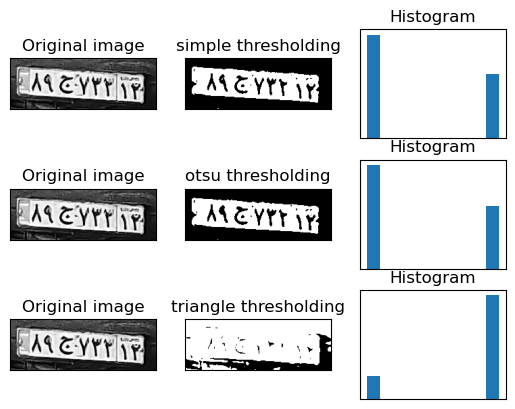

In [2]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread(r"D:\jupiter\OpenCv\pelak3.png",0)
blurred = cv2.GaussianBlur(img,(5,5),0)

ret1,thresh1 = cv2.threshold(blurred,127,255,cv2.THRESH_BINARY)
ret2,thresh2 = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret3,thresh3 = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)
print(ret1,ret2,ret3)
#print(thresh1,thresh2,thresh3)
images = [img,thresh1,0
         ,img,thresh2,0
         ,img,thresh3,0]

titles = ["Original image","simple thresholding","Histogram",
         "Original image","otsu thresholding","Histogram",
         "Original image","triangle thresholding","Histogram",]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],"gray"),plt.title(titles[i*3]),plt.xticks([]),plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.imshow(images[i*3+1],"gray"),plt.title(titles[i*3+1]),plt.xticks([]),plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.hist((images[i*3+1]).flatten()),plt.title(titles[i*3+2]),plt.xticks([]),plt.yticks([])
plt.show()    

# آستانه گیری تطبیقی

درآستانه گیری ساده اگر روشنایی یک پیکسل کمی از حد آستانه کمتر باشد با رنگ سیاه نمایش داده میشود

و این مشکلی است که در آستانه گیری ساده وجود دارد

برای رفع این مشکل از آستانه گیری تطبیقی استفاده میکنیم در این روش از یک حد آستانه ثابت استفاده نمیشود

ابتدا تصویر به بلوک های کوچک تقسیم شده سپس مقدار حد آستانه برای هربلوک محاسبه و عملیات آستانه گیری بروی پیکسل های آن بلوک اعمال میشود

dst = cv2.adaptiveThreshold(src,maxVal,adaptiveMethod,thresholdType,blockSize,C)

src = تصویر ورودی

maxVal =  نسبت داده میشود thresholdTypeبیشترین مقداری که به هر پیکسل برحسب پارامتر 

adaptiveMethod = ADAPTIVE_THRESH_MEAN_C , ADAPTIVE_THRESH_GAUSSIAN_C

thresholdType = THRESH_BINARY , THRESH_BINARY_INV نوع آستانه گیری را مشخص میکند وفقط2نوع دارد

blockSize = ابعاد هر بلوک که باید فرد باشد

C = مقداری ثابت است که در هنگام محاسبه حدآستانه،از نتیجه میانگین گیری یا جمع وزنی کم میشود





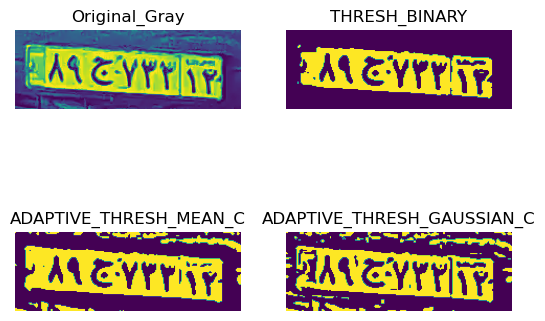

In [4]:
from matplotlib import pyplot as plt
import cv2

img = cv2 .imread(r"D:\jupiter\OpenCv\pelak3.png",0)
blured = cv2.GaussianBlur(img,(5,5),0)

thresh,dst1 = cv2.threshold(blured,180,255,cv2.THRESH_BINARY)
dst2 = cv2.adaptiveThreshold(blured,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,31,-3)
dst3 = cv2.adaptiveThreshold(blured,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,25,-3)
#print(dst2)

imgs = [img,dst1,dst2,dst3]
titles = ["Original_Gray","THRESH_BINARY","ADAPTIVE_THRESH_MEAN_C","ADAPTIVE_THRESH_GAUSSIAN_C"]
for i in range(len(titles)):
    plt.subplot(2,2,i+1)
    plt.imshow(imgs[i])
    plt.title(titles[i])
    plt.axis("off")
plt.show()    

# آشکار سازی لبه

قسمتی از تصویر که درآن تغییرات روشنایی شدید باشد را لبه میگویند

پستی وبلندی های روی تصویر باعث ایجاد سایه هایی روی تصویر میشودهدف الگوریتم لبه یابی پیدا کردن این سایه هاست

از نظر ریاضی هدف از تشخیص لبه پیداکردن پیکسل هایی که تغییرات روشنایی درآنها نسبت به پیکسل های مجاورشان شدیدتر باشدبدین منظور از تصویر مشتق گرفته میشود

 دو روش کلی برای تشخیص لبه دارد فیلتر های بالاگذر و الگوریتم تشخیص لبه کنی opencv کتابخانه 

# فیلترهای بالاگذر

فیلترهای بالاگذر به دلیل خاصیت مشتق گیری که دارند در تشخیص لبه به کار میروندزیرا مشتق تغییرات شدید روشنایی(لبه) رانشان میدهد

فیلترهای بالا گذر (سابل-چار-لاپلاس)

# فیلتر سابل

In [ ]:
فیلتر سابل مشتق تصویر را به کمک ماتریس هسته و عملیات کانولوشن محاسبه میکند

dst = cv2.Sobel(src,ddepth,dx,dy,ksize,delta)

src = تصویر ورودی

ddepth = (CV_8U,CV_16S,CV_32F,CV_64F)نوع داده های تصویر خروجی

dx , dy = مرتبه مشتق نسبت به محورعمودی وافقی را مشخص میکنند

ksize = ابعاد ماتریس هسته-مقدار اولیه 3 است

delta = پارامتر دلخواهی که با نتیجه نهایی جمع میشود

dx = 1 [[-1,0,1]             dy = 1 [[-1,-2,-1]
        [-2,0,-2]                    [0,0,0]
        [-1,0,1]]                    [1,2,1]]   

# فیلتر چار

In [ ]:
حالت خاصی از فیلترسابل است ودرآن از ماتریس 3در3 مانند زیر استفاده میشود


dx = 1 [[-3,0,3]             dy = 1 [[-3,-10,-3]
        [10,0,10]                    [0,0,0]
        [-3,0,3]]                    [3,10,3]] 

این ماتریس هسته باعث افزایش کیفیت خروجی تصویرمیشود

dst = cv2.Scharr(src,ddepth,dx,dy,delta)

src = تصویر ورودی

ddepth = (CV_8U,CV_16S,CV_32F,CV_64F)نوع داده های تصویر خروجی

dx , dy = مرتبه مشتق نسبت به محورعمودی وافقی را مشخص میکنند


delta = پارامتر دلخواهی که با نتیجه نهایی جمع میشود

# فیلترلاپلاس

این فیلتر لبه ها را از طریق محاسبه مشتق مرتبه دوم محاسبه میکند

dst = cv2.Laplacian(src,ddepth,ksize,delta)

src = تصویر ورودی

ddepth = (CV_8U,CV_16S,CV_32F,CV_64F)نوع داده های تصویر خروجی

ksize = ابعاد ماتریس هسته-مقدار اولیه 1 است

delta = پارامتر دلخواهی که با نتیجه نهایی جمع میشود


In [ ]:
 M  [[0,1,0]
     [1,-4,1]
     [0,1,0]]

In [5]:
pwd

'C:\\Users\\Admin\\OpenCv'

(76, 216, 3)
(76, 216, 3)
(76, 216, 3)
(76, 216, 3)
(76, 216, 3)
(76, 216, 3)


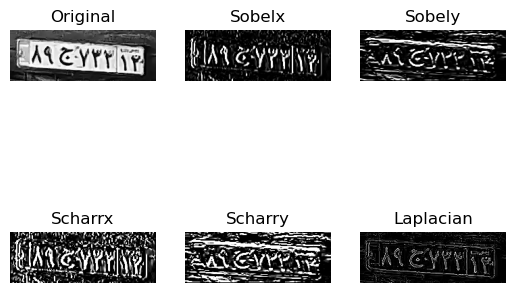

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(r"D:\jupiter\OpenCv\pelak3.png")
print(img.shape)

sobelx = cv2.Sobel(img,-1,1,0,3)
sobely = cv2.Sobel(img,-1,0,1,3)
print(sobelx.shape)
print(sobely.shape)

Scharrx = cv2.Scharr(img,-1,1,0)
Scharry = cv2.Scharr(img,-1,0,1)
print(Scharrx.shape)
print(Scharry.shape)

Laplacian = cv2.Laplacian(img,-1,21)
print(Laplacian.shape)

plt.subplot(231),plt.imshow(img),plt.title("Original"),plt.axis("off")
plt.subplot(232),plt.imshow(sobelx),plt.title("Sobelx"),plt.axis("off")
plt.subplot(233),plt.imshow(sobely),plt.title("Sobely"),plt.axis("off")
plt.subplot(234),plt.imshow(Scharrx),plt.title("Scharrx"),plt.axis("off")
plt.subplot(235),plt.imshow(Scharry),plt.title("Scharry"),plt.axis("off")
plt.subplot(236),plt.imshow(Laplacian),plt.title("Laplacian"),plt.axis("off")
plt.show()

# تشخیص میزان تارشدگی تصویر با لاپلاس

بدین منظور ابتدا لاپلاس تصویر را محاسبه سپس میزان واریانس آن را با یک حد آستانه دلخواه مقایسه کنید اگر مقدار واریانس کتر از حد آستانه باشد تصویر تار است 

وتشخیص لبه ها دشوار است

2295.8721948125317
943.1634334467266
5459.200458310181


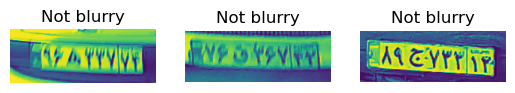

In [11]:
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt
i=0
for imgagPath in glob.glob(r"D:\jupiter\OpenCv\pelak*.png"):
    i+=1
    image = cv2.imread(imgagPath,0)
    image = cv2.resize(image,None,fx=0.9,fy=0.9,interpolation=cv2.INTER_LANCZOS4)
    vol = cv2.Laplacian(image,cv2.CV_64F).var()
    print(vol)
    
    text = "Not blurry"
    if vol < 500:
        text = "Blurry"
    plt.subplot(1,3,i)
    plt.imshow(image)
    plt.title(f"{text}")
    plt.axis("off")
plt.show()    
    
    

# arr.var()محاسبه واریانس 

# الگوریتم کنی

الگوریتم کنی یک از پرکاربردترین روش های آشکار سازی لبه در پردازش تصویر است بطورکلی عملکرد این الگوریتم

درچهار مرحله خلاصه میشود

1حذف نویزها

2 محاسبه اندازه وجهت بردارهای گرادیان

3شناسایی لبه های بالقوه 

4شناسایی باقی لبه ها 

edges = cv2.Canny(img,minVal,maxVal,apertureSize,L2gradient)

img= تصویر ورودی 

minVal= حدآستانه پایین هیسترزیس  

maxVal= حدآستانه بالا هیسترزیس

apertureSize=ابعاد ماتریس هسته برای مشتق سابل که پیشفرض3در3است

L2gradient=پارامتر بولی برای روش محاسبه اندازه بردارهای گرادیان

(393, 222)


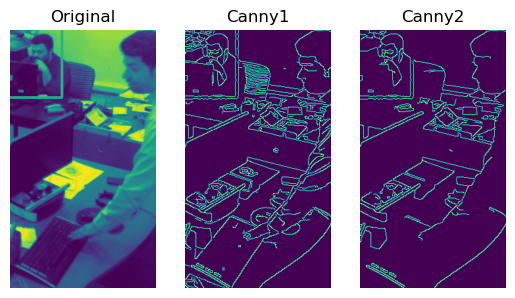

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("2.jpg",0)
print(img.shape)

canny1 = cv2.Canny(img,30,120)
canny2 = cv2.Canny(img,100,250,True)

plt.subplot(131),plt.imshow(img),plt.title("Original"),plt.axis("off")
plt.subplot(132),plt.imshow(canny1),plt.title("Canny1"),plt.axis("off")
plt.subplot(133),plt.imshow(canny2),plt.title("Canny2"),plt.axis("off")
plt.show()

محاسبه حدود آستانه مناسب برای هر تصویر

v = np.median(gray)محسبه میانگین پیکسل های تصویر

164.0
89.0
115.0
186.0


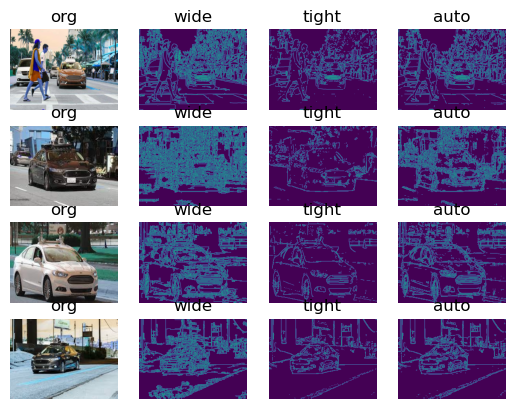

In [34]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt

sigma = 0.1
i=0
for img in glob.glob("C:\\Users\\NSC\\Pictures\\car\\*.png"):
    image = cv2.imread(img)
    image = cv2.resize(image,(640,480),interpolation = cv2.INTER_AREA)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    wide = cv2.Canny(gray,10,200)
    tight = cv2.Canny(gray,225,250)
    
    v = np.median(gray)
    print(v)
    
    lower = int(max(0,(1.0-sigma)*v))
    upper = int(min(255,(1.0+sigma)*v))
    
    auto = cv2.Canny(gray,lower,upper)
    plt.subplot(4,4,i+1),plt.title("org"),plt.imshow(image),plt.axis("off")
    plt.subplot(4,4,i+2),plt.title("wide"),plt.imshow(wide),plt.axis("off")
    plt.subplot(4,4,i+3),plt.title("tight"),plt.imshow(tight),plt.axis("off")
    plt.subplot(4,4,i+4),plt.title("auto"),plt.imshow(auto),plt.axis("off")
    i+=4
    
plt.show()    

imutilsتابع بالا بصورت آماده در

import imutils

# dst = imutils.auto_canny(img,sigma=0.33)

# تبدیلات هاف

گاهی اوقات به تمام لبه های موجود در تصویر نیازی نیست در این شرایط از تبدیلات هاف استفاده میکنیم

# خط راست

(فاصله نقطه تا مبداp=xcos@+ysin@)الگورتیم هاف از فضای مثلثاتی برای پیدا کردن خط راست استفاده میکند

وزاویه پیدا شده از0تا 180 درجه دنبال نقاط بعدی میگرددتا تمام نقاط خط یافت شودpهنگامی که اولین نقطه پیدا شود الگوریتم هاف به ازای 

مختصات مبدا:

x0 = p*cos@

y0 = p*sin@

 لبه ها پیدا شدcannyابتدا بایدتوسط

(rho,theta) = cv2.HoughLines(edge,rho,theta,threshold)

image=تصویر ورودی باید8بیتی و یک کاناله باشد

rho=میزان دقت فاصله عمودی اندازه گیری شده از مبدا تا خط راست (p)

theta=میزان دقت پارامترزاویه(@)

threshold=پس از پیدا شدن خطوط فقط آن دسته از خطوطی که از حد آستانه بالاتر هستند را نمایش میدهد



In [28]:
import cv2
import numpy as np
import imutils


image = cv2.imread("met.jpg")
image = cv2.resize(image,(640,480),interpolation=cv2.INTER_AREA)
clone = image.copy()
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

edges = imutils.auto_canny(gray,sigma=0.33)
cv2.imshow("s",edges)
cv2.waitKey(0)
lines = cv2.HoughLines(edges,1,np.pi/180,80)
print(lines.shape)
for data in lines:
    (rho,theta) = data[0][0],data[0][1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0+10*(-b))
    y1 = int(y0+10*(a))
    x2 = int(x0-10*(-b))
    y2 = int(y0-10*(a))
    cv2.line(image,(x1,y1),(x2,y2),(255,0,0),3)
cv2.imshow("Hough Lines",np.hstack((clone,image)))
cv2.waitKey(0)
cv2.destroyAllWindows()
    
    






(6033, 1, 2)


برای رفع مشکلات تابع بالا:
    
x1,y1,x2,y2 = cv2.HoughLinesP(image,rho,theta,threshold,minLineLenght,maxLineLenght)
    
image=تصویرورودی که باید تک کاناله باشدوخروجی کنی

theta , rho = میزان دقت فاصله و زاویه

threshold = حد آستانه خطوط پیدا شده

minLineLenght = کمترین طولی که هر خط باید داشته باشد

maxLineGap = حداقل فاصله مجاز میان دونقطه از خط

In [3]:
import cv2
import numpy as np
import imutils


image = cv2.imread("met.jpg")
image = cv2.resize(image,(640,480),interpolation=cv2.INTER_AREA)
clone = image.copy()
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(3,3),0)

edges = imutils.auto_canny(gray,sigma=0.33)
cv2.imshow("s",edges)
cv2.waitKey(0)
lines = cv2.HoughLinesP(edges,1,1,50,10,3)
print(lines.shape)
for data in lines:
    (x1,y1,x2,y2) = data[0][0],data[0][1],data[0][2],data[0][3]
    cv2.line(image,(x1,y1),(x2,y2),(255,0,0),2)
cv2.imshow("HoughP Lines",np.hstack((clone,image)))
cv2.waitKey(0)
cv2.destroyAllWindows()
    
    

(520, 1, 4)


# دایره

(cx,cy,r) = cv2.HoughCircles(image,method,dp,minDist)

image =تصویر ورودی که باید 8بیتی و خاکستری باشد

method =الگوریتمی که برای شناسایی دایره ها استفاده میشود

dp = هرچه مقدار این پارامتر کمتر باشد دقت الگوریتم افزایش میابد

minDist =کمترین فاصله مجاز بین مرکز دایره های پیدا شده



In [19]:
import cv2
import imutils
import numpy as np

image = cv2.imread("cir.png")
#image = cv2.resize(image,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_AREA)
clone =image.copy()
gray =cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#gray =cv2.filter2D(gray,-1,(5,5))
#edges = imutils.auto_canny(gray,sigma=0.33)
circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1.012,1)
#print(circles.shape)
for i in circles[0,:]:
    (cx,cy,r) = i[0],i[1],i[2]
   # print(cx,cy,r)
    cv2.circle(clone,(int(cx),int(cy)),int(r),(255,0,0),2)
cv2.imshow("HoughCircle",clone)
cv2.waitKey(0)
cv2.destroyAllWindows()


# الگویابی

dst = cv2.matchTemplate(image,temple,method,mask)

image = -خاکستری وتصویری که قرار است الگو داخل آن پیدا شود

temple = الگوی مورد نظراز نظر فرمت وابعاد با تصویر ورودی برابر است

method =  روش های جستجوی الگو در تصویرباید به صورت اینت وارد شود 

(TM_CCOEFF,TM_CCOEFF_NORMED,TM_CCORR,TM_CCORR_NORMED,TM_SQDIFF,TM_SQDIFF_NORMED)

mask = ماسکی هم اندازه با تصویر را ازکاربر میگیرد و فرآیند الگو یابی را به قسمت های سفید ماسک محدود میکند

(TM_SQDIFF,TM_CCORR_NORMED)

dst = ماترسی دوبعدی که در آن هر پیکسل علاوه برمختصات دارای یک ارزش نیز میباشد

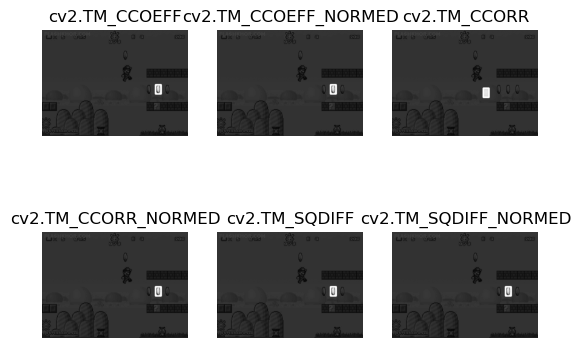

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img_s = cv2.imread("mar_1.jpg",0)
img = cv2.imread("mar.jpg",0)
#print(img.shape)
(h,w) = img_s.shape[0:2]

images = []
methods = ["cv2.TM_CCOEFF","cv2.TM_CCOEFF_NORMED","cv2.TM_CCORR","cv2.TM_CCORR_NORMED"
           ,"cv2.TM_SQDIFF","cv2.TM_SQDIFF_NORMED"]
for i,meth in enumerate (methods):
    img1 = img.copy()
    method = eval(meth)#تبدیل رشته به عدد
    #print(method)
    res = cv2.matchTemplate(img,img_s,method)
    #print(res)
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
   # print(max_loc)
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0]+w , top_left[1]+h)
    
    roi = img1[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]]
    mask = np.zeros(img1.shape,dtype="uint8")
    img1 = cv2.addWeighted(img1,0.25,mask,0.75,0)
    img1[top_left[1]:bottom_right[1],top_left[0]:bottom_right[0]]=roi
    cv2.rectangle(img1,top_left,bottom_right,(255,255,255),5)
    images.append(img1)
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],"gray"),plt.title(methods[i]),plt.axis("off")
plt.show()    
    
    


# یافتن چند الگو در تصویر 

دراین حالت باید از روش های (TM_CCOEFF_NORMEDوTM_CCORR_NORMEDوTM_SQDIFF_NORMED)

که خروجی تابع در بازه 0و1 است وکافی است حد آستانه را مقداری بین 0و1 در نظر بگیریم

استفاده کردwhere برای پیداکردن مختصات هر پیکسل هم میتوان از 

In [17]:
import cv2
import numpy as np

image = cv2.imread("mar.jpg",0)
template = cv2.imread("mar_1.jpg",0)
h,w = template.shape[0:2]

res = cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)
print(res)
threshold = 0.7
loc = np.where(res >= threshold) #نقاطی که مقدارش بیشتر از آستانه است را خروجی میدهد
print(loc)
#print(*loc[::-1])
#print(list(zip(*loc[::-1])))

for pt in zip( * loc [::-1]):
    cv2.rectangle(image,pt,(pt[0]+w,pt[1]+h),0,1)
cv2.imshow("Multiple Object",image)
cv2.waitKey(0)
cv2.destroyAllWindows()


[[-0.0615602  -0.00529965  0.09645247 ...  0.11312853  0.10017747
   0.1134842 ]
 [-0.05573256  0.00474028  0.09959607 ...  0.14109851  0.12201325
   0.11364786]
 [-0.04737079  0.01313158  0.09867159 ...  0.15116332  0.12486197
   0.09359509]
 ...
 [ 0.0846006   0.05263191  0.04706741 ...  0.20981947  0.22052021
   0.25473404]
 [ 0.1303114   0.08148774  0.05920703 ...  0.19650666  0.20756891
   0.24491534]
 [ 0.16475718  0.1019318   0.0626905  ...  0.17365932  0.18612133
   0.22652858]]
(array([ 93,  93,  94,  94,  95,  95,  96, 242, 242, 242, 243, 243, 243,
       244, 244, 244, 245, 245, 245, 246, 246, 246], dtype=int64), array([356, 357, 356, 357, 356, 357, 357, 460, 501, 542, 460, 501, 542,
       460, 501, 542, 460, 501, 542, 460, 501, 542], dtype=int64))


np.where(condition,x,y)

condition = را برقرار میکنند برمیگرداندcondition داده هایی که شرط 

x,y =   بازمیگرداندyوگرنه مقدارxاگر این دو مقدار دهی شده باشند و شرط برقرار باشد مقدار

In [10]:
import cv2
import numpy as np

image = cv2.imread("mar.jpg")
template = cv2.imread("mar_1.jpg")
h,w = template.shape[0:2]

res = cv2.matchTemplate(image,template,cv2.TM_CCOEFF_NORMED)
print(res.shape)
threshold = 0.8
loc = np.where(res >= threshold)
print(loc)
#print(*loc[::-1])
#print(list(zip(*loc[::-1])))

for pt in zip( * loc [::-1]):
    cv2.rectangle(image,pt,(pt[0]+w,pt[1]+h),(255,255,0),1)
cv2.imshow("Multiple Object",image)
cv2.waitKey(0)
cv2.destroyAllWindows()


(430, 621)
(array([ 93,  94,  94,  95,  95, 242, 242, 242, 243, 243, 243, 244, 244,
       244, 245, 245, 245, 246, 246, 246], dtype=int64), array([357, 356, 357, 356, 357, 460, 501, 542, 460, 501, 542, 460, 501,
       542, 460, 501, 542, 460, 501, 542], dtype=int64))


# یافتن یک الگو با اندازه های مختلف در تصویر

ابتدا الگو را به فضای خاکستری برده و آستانه گیری را روی الگو انجام میدهیم

فریم را از ورودی گرفته و در فضای خاکستری آستانه گیری میکنیم

در یک حلقه فرایند کوچک سازی فریم را انجام میدهیم تا زمانیکه بزرگتر ازالگو باشد



In [4]:
import cv2
import numpy as np
import imutils as imu


cam = cv2.VideoCapture(0)
template = cv2.imread("sample.jpeg",0)
re,template = cv2.threshold(template,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
(tH,tW) = template.shape[:2]

while True:
    _,frame = cam.read()
    found = None
    frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    for scale in np.linspace(0.2,1.0,20)[::-1]:
        resized = imu.resize(frame_gray,width = int(frame_gray.shape[1]*scale))
        r = frame_gray.shape[1]/float(resized.shape[1])
        if resized.shape[0]<tH or resized.shape[1]<tW:
            break
     
        re1,frame_thresh = cv2.threshold(resized,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        result = cv2.matchTemplate(frame_thresh,template,cv2.TM_CCOEFF)
    
        minval,maxval,minloc,maxloc = cv2.minMaxLoc(result)
        if found is None or maxval>found[0]:
            found = (maxval,maxloc,r)
            
    (__,maxloc,r) = found
    (startx,starty) = int(maxloc[0]*r),int(maxloc[1]*r)
    (endx,endy) = int(startx+tW*r),int(starty+tH*r)
    cv2.rectangle(frame,(startx,starty),(endx,endy),(255,0,0),1)
    cv2.imshow("frame",frame)
    if cv2.waitKey(1)==27:
        break
cam.release()
cv2.destroyAllWindows()
     

[[ 2.32588860e+07  2.31551980e+07  2.30778360e+07 ... -3.90426840e+07
  -3.72695400e+07 -3.64335640e+07]
 [ 2.65604720e+07  2.65218080e+07  2.64441900e+07 ... -4.12547080e+07
  -3.93264720e+07 -3.81382840e+07]
 [ 2.99926180e+07  2.99537000e+07  2.98113120e+07 ... -4.30499720e+07
  -4.11599200e+07 -4.02067880e+07]
 ...
 [-1.18996600e+08 -1.18645112e+08 -1.18332592e+08 ... -1.00578560e+07
  -5.36542400e+06 -1.24451562e+06]
 [-1.17710752e+08 -1.17229096e+08 -1.16916440e+08 ... -9.16202900e+06
  -4.53449350e+06 -2.83537219e+05]
 [-1.16424912e+08 -1.16008152e+08 -1.15630728e+08 ... -7.61647500e+06
  -2.92365900e+06  1.06707312e+06]]
[[ 6.35837160e+07  6.31286200e+07  6.26616640e+07 ... -4.02098160e+07
  -3.99975760e+07 -4.00332760e+07]
 [ 6.55845680e+07  6.50647040e+07  6.45974880e+07 ... -4.28773000e+07
  -4.27698080e+07 -4.29094880e+07]
 [ 6.75854160e+07  6.70663240e+07  6.66636200e+07 ... -4.55321520e+07
  -4.59187840e+07 -4.63572600e+07]
 ...
 [-1.19765624e+08 -1.17458280e+08 -1.1520240

[[ 6.28338520e+07  6.23529440e+07  6.18075240e+07 ... -3.86551760e+07
  -3.87683120e+07 -3.88171920e+07]
 [ 6.48344440e+07  6.42885160e+07  6.37430960e+07 ... -4.09977960e+07
  -4.11501440e+07 -4.13675160e+07]
 [ 6.68355520e+07  6.62896200e+07  6.58089680e+07 ... -4.36265800e+07
  -4.40782360e+07 -4.47252200e+07]
 ...
 [-1.19996400e+08 -1.17766744e+08 -1.15524296e+08 ... -1.64561980e+07
  -1.55888860e+07 -1.42916700e+07]
 [-1.18710552e+08 -1.16481160e+08 -1.14303736e+08 ... -1.43907070e+07
  -1.30675880e+07 -1.20307230e+07]
 [-1.17229768e+08 -1.14870200e+08 -1.12692648e+08 ... -1.27142090e+07
  -1.11313770e+07 -1.00946410e+07]]
[[ 8.04524800e+07  8.08056880e+07  8.10933520e+07 ... -8.82293680e+07
  -8.54275120e+07 -8.20410000e+07]
 [ 8.18428880e+07  8.21571360e+07  8.24711280e+07 ... -9.16143840e+07
  -8.88512320e+07 -8.58282800e+07]
 [ 8.33894160e+07  8.37944960e+07  8.41993200e+07 ... -9.56230560e+07
  -9.28993760e+07 -8.96552800e+07]
 ...
 [-1.00196544e+08 -1.01139520e+08 -1.0256335

[[ 2.19118320e+07  2.18081440e+07  2.16915700e+07 ... -3.84442520e+07
  -3.68398520e+07 -3.58348760e+07]
 [ 2.52005300e+07  2.50968440e+07  2.49802680e+07 ... -4.10983000e+07
  -3.90787120e+07 -3.77873160e+07]
 [ 2.85671400e+07  2.83979180e+07  2.83463660e+07 ... -4.29462120e+07
  -4.09005560e+07 -3.97128800e+07]
 ...
 [-1.19575992e+08 -1.19289664e+08 -1.18951072e+08 ... -1.12052750e+07
  -6.12231550e+06 -8.17794500e+05]
 [-1.18225384e+08 -1.17808752e+08 -1.17339984e+08 ... -1.03744730e+07
  -5.42181700e+06 -2.47472125e+05]
 [-1.17004440e+08 -1.16588192e+08 -1.16054136e+08 ... -8.76389400e+06
  -4.26615050e+06  9.73218250e+05]]
[[ 6.29003400e+07  6.24460120e+07  6.19264040e+07 ... -3.99481120e+07
  -4.01528520e+07 -3.99540080e+07]
 [ 6.49667240e+07  6.44468640e+07  6.38622320e+07 ... -4.20046040e+07
  -4.21840440e+07 -4.28692160e+07]
 [ 6.69675760e+07  6.63829440e+07  6.58633400e+07 ... -4.50243000e+07
  -4.51766480e+07 -4.59663120e+07]
 ...
 [-1.20945104e+08 -1.18728600e+08 -1.1638204

[[ 6.24498560e+07  6.19039240e+07  6.14888080e+07 ... -3.77591920e+07
  -3.76125240e+07 -3.80773600e+07]
 [ 6.45802400e+07  6.39695440e+07  6.34238680e+07 ... -3.96990360e+07
  -3.97869080e+07 -4.03557240e+07]
 [ 6.65168360e+07  6.59714160e+07  6.53607160e+07 ... -4.27564080e+07
  -4.30780520e+07 -4.35557760e+07]
 ...
 [-1.21590896e+08 -1.19426656e+08 -1.17106296e+08 ... -1.77221140e+07
  -1.76739540e+07 -1.67411980e+07]
 [-1.20370592e+08 -1.18336272e+08 -1.16275880e+08 ... -1.53961430e+07
  -1.49579680e+07 -1.41547470e+07]
 [-1.18889416e+08 -1.16790200e+08 -1.14729808e+08 ... -1.34598040e+07
  -1.25665890e+07 -1.17637530e+07]]
[[ 7.92363200e+07  7.95239840e+07  7.98769280e+07 ... -9.06149680e+07
  -8.76177840e+07 -8.41915120e+07]
 [ 8.04050720e+07  8.07843440e+07  8.12283840e+07 ... -9.36740960e+07
  -9.05213120e+07 -8.74598800e+07]
 [ 8.19255280e+07  8.23308640e+07  8.27356960e+07 ... -9.70591120e+07
  -9.40105680e+07 -9.09875760e+07]
 ...
 [-9.95296080e+07 -1.00212240e+08 -1.0118116

[[ 43379536.    41270068.    39485460.   ...  10312891.     4110165.
   -2181970.  ]
 [ 40893860.    38914308.    37000168.   ...  11742218.     5474212.
    -883203.2 ]
 [ 37953272.    36038872.    34189496.   ...  12364932.     5967390.5
     194935.53]
 ...
 [ -2750298.2   -3559417.2   -4238104.   ... -29196250.   -33733872.
  -37425140.  ]
 [ -5950856.    -6564903.    -7178822.   ... -34607624.   -38430236.
  -41796128.  ]
 [ -9151926.    -9635925.   -10314995.   ... -38719284.   -42086348.
  -44932428.  ]]
[[ 2.03840580e+07  2.02153460e+07  2.00466340e+07 ... -3.87852320e+07
  -3.68694040e+07 -3.57728240e+07]
 [ 2.36338000e+07  2.34648320e+07  2.32958660e+07 ... -4.09327400e+07
  -3.89911040e+07 -3.73477480e+07]
 [ 2.70004100e+07  2.68314440e+07  2.66632440e+07 ... -4.22860160e+07
  -4.07737360e+07 -3.91043120e+07]
 ...
 [-1.20622536e+08 -1.20335944e+08 -1.19984592e+08 ... -1.08485680e+07
  -6.32504900e+06 -1.41092800e+06]
 [-1.19011312e+08 -1.18594680e+08 -1.18243200e+08 ... -1.0

[[ 6.0396364e+07  5.6464172e+07  5.3156152e+07 ... -1.3763811e+08
  -1.3984267e+08 -1.4148680e+08]
 [ 6.2984700e+07  5.8922460e+07  5.5614180e+07 ... -1.3595213e+08
  -1.3851974e+08 -1.4033339e+08]
 [ 6.6157480e+07  6.1965448e+07  5.8592148e+07 ... -1.3478661e+08
  -1.3726261e+08 -1.3944110e+08]
 ...
 [-1.3725440e+08 -1.3936605e+08 -1.4085339e+08 ... -1.7038292e+07
  -1.5467927e+07 -1.3572021e+07]
 [-1.4188600e+08 -1.4399752e+08 -1.4535494e+08 ... -1.3346049e+07
  -1.2036164e+07 -1.0790755e+07]
 [-1.4645245e+08 -1.4830413e+08 -1.4966130e+08 ... -1.1345071e+07
  -9.6447860e+06 -8.7246240e+06]]
[[ 7.45298320e+07  7.35234240e+07  7.19707600e+07 ... -1.16083568e+08
  -1.15385264e+08 -1.15570456e+08]
 [ 7.74306560e+07  7.64239920e+07  7.48715840e+07 ... -1.11359368e+08
  -1.10569200e+08 -1.10794368e+08]
 [ 8.03694080e+07  7.92334720e+07  7.77450640e+07 ... -1.07831952e+08
  -1.06626344e+08 -1.05979368e+08]
 ...
 [-8.89711920e+07 -8.74416560e+07 -8.57428720e+07 ... -3.87205720e+07
  -3.88267

[[ 6.25477960e+07  6.20932160e+07  6.15996760e+07 ... -3.75140400e+07
  -3.77448480e+07 -3.77023760e+07]
 [ 6.45486480e+07  6.40290400e+07  6.35355040e+07 ... -3.97918920e+07
  -3.99968880e+07 -4.03832600e+07]
 [ 6.65500080e+07  6.60301480e+07  6.56021440e+07 ... -4.22645600e+07
  -4.28978880e+07 -4.34537760e+07]
 ...
 [-1.20281264e+08 -1.18064880e+08 -1.15705280e+08 ... -1.54827290e+07
  -1.46019810e+07 -1.30184350e+07]
 [-1.18930520e+08 -1.16779040e+08 -1.14484328e+08 ... -1.32215270e+07
  -1.18857380e+07 -1.06274410e+07]
 [-1.17384584e+08 -1.15168208e+08 -1.12938648e+08 ... -1.14809000e+07
  -9.88488800e+06 -8.62620700e+06]]
[[ 7.96481440e+07  8.00268960e+07  8.04061680e+07 ... -8.78957920e+07
  -8.48859840e+07 -8.15521120e+07]
 [ 8.10377760e+07  8.14431200e+07  8.17834320e+07 ... -9.12155280e+07
  -8.79200640e+07 -8.50800640e+07]
 [ 8.25848160e+07  8.30812480e+07  8.35121360e+07 ... -9.51860160e+07
  -9.19284880e+07 -8.89321120e+07]
 ...
 [-9.95964240e+07 -1.00539280e+08 -1.0206734

[[ 39389228.    37734796.    36184472.   ...   6858714.5     604437.94
   -5349104.  ]
 [ 36708220.    34923740.    33633388.   ...   7351125.5     966800.6
   -4401781.  ]
 [ 33767632.    31983024.    30692926.   ...   7115640.5    1186483.6
   -4181842.2 ]
 ...
 [ -7130114.    -7809185.    -8254100.   ... -36460392.   -40165168.
  -43712912.  ]
 [-10136112.   -10880206.   -11390274.   ... -41027092.   -44341852.
  -47304124.  ]
 [-13467613.   -14146684.   -14656751.   ... -44943684.   -47218060.
  -49530604.  ]]
[[ 2.33496120e+07  2.31809000e+07  2.29471660e+07 ... -3.87706960e+07
  -3.66079160e+07 -3.56808520e+07]
 [ 2.67157100e+07  2.65469980e+07  2.63132640e+07 ... -4.07486200e+07
  -3.86245400e+07 -3.70214200e+07]
 [ 3.01470880e+07  2.99130980e+07  2.96796180e+07 ... -4.23879480e+07
  -4.03683600e+07 -3.88682000e+07]
 ...
 [-1.18905616e+08 -1.18554136e+08 -1.18202656e+08 ... -6.46349550e+06
  -1.22441938e+06  3.68953675e+06]
 [-1.17555640e+08 -1.17138752e+08 -1.16722376e+08 ... -

[[ 2.36454800e+07  2.34380680e+07  2.33994060e+07 ... -3.67587640e+07
  -3.49211080e+07 -3.39548280e+07]
 [ 2.69473220e+07  2.68694480e+07  2.67660160e+07 ... -3.85926520e+07
  -3.66639040e+07 -3.54114600e+07]
 [ 3.03136760e+07  3.03013380e+07  3.01976500e+07 ... -4.01151160e+07
  -3.80302480e+07 -3.70115800e+07]
 ...
 [-1.18610384e+08 -1.18102536e+08 -1.17621256e+08 ... -4.03573550e+06
   1.34644088e+06  5.75325750e+06]
 [-1.17194112e+08 -1.16686512e+08 -1.16139960e+08 ... -3.00998925e+06
   2.43733925e+06  6.77938750e+06]
 [-1.15778992e+08 -1.15271648e+08 -1.14854760e+08 ... -1.78968275e+06
   3.20222175e+06  7.86926200e+06]]
[[ 6.38411760e+07  6.34774320e+07  6.30228480e+07 ... -3.64675440e+07
  -3.67114960e+07 -3.70720960e+07]
 [ 6.59073080e+07  6.54132560e+07  6.49591880e+07 ... -3.93306120e+07
  -3.94827040e+07 -4.00778440e+07]
 [ 6.79079040e+07  6.74796400e+07  6.70248040e+07 ... -4.19849520e+07
  -4.26324480e+07 -4.36561760e+07]
 ...
 [-1.18557280e+08 -1.16353664e+08 -1.1417636

[[ 6.41911560e+07  6.36710400e+07  6.32425240e+07 ... -4.17121760e+07
  -4.19687600e+07 -4.24728040e+07]
 [ 6.61267280e+07  6.56073760e+07  6.51788640e+07 ... -4.49259200e+07
  -4.53512520e+07 -4.54390840e+07]
 [ 6.81275760e+07  6.76727360e+07  6.72442240e+07 ... -4.79980080e+07
  -4.83970160e+07 -4.91737920e+07]
 ...
 [-1.19131624e+08 -1.17019352e+08 -1.14919584e+08 ... -2.13838400e+07
  -2.04385240e+07 -1.97266900e+07]
 [-1.17650960e+08 -1.15473160e+08 -1.13373904e+08 ... -1.90573580e+07
  -1.81121700e+07 -1.75307660e+07]
 [-1.16040384e+08 -1.13862960e+08 -1.11633272e+08 ... -1.75773380e+07
  -1.67618160e+07 -1.62454370e+07]]
[[ 8.08100800e+07  8.12543760e+07  8.16592000e+07 ... -9.45935040e+07
  -9.19217040e+07 -8.84833040e+07]
 [ 8.22650000e+07  8.27353600e+07  8.32963040e+07 ... -9.84729040e+07
  -9.55151920e+07 -9.23755920e+07]
 [ 8.38115280e+07  8.45027680e+07  8.51550640e+07 ... -1.02611888e+08
  -9.94327760e+07 -9.66569920e+07]
 ...
 [-1.01672304e+08 -1.02680176e+08 -1.0431209

[[ 6.42034600e+07  6.37746880e+07  6.33201080e+07 ... -4.10300120e+07
  -4.11436600e+07 -4.16345280e+07]
 [ 6.61392840e+07  6.57105160e+07  6.52564440e+07 ... -4.41400320e+07
  -4.44224280e+07 -4.48222040e+07]
 [ 6.82049040e+07  6.77763920e+07  6.72567840e+07 ... -4.72113520e+07
  -4.75327040e+07 -4.83610680e+07]
 ...
 [-1.19432336e+08 -1.17163696e+08 -1.15025232e+08 ... -1.93061160e+07
  -1.84000140e+07 -1.72200860e+07]
 [-1.17821504e+08 -1.15618144e+08 -1.13479672e+08 ... -1.71101940e+07
  -1.60740430e+07 -1.49591390e+07]
 [-1.16146288e+08 -1.13877640e+08 -1.11803944e+08 ... -1.57598390e+07
  -1.46584080e+07 -1.36735520e+07]]
[[ 8.06660480e+07  8.10842720e+07  8.14627760e+07 ... -9.37949840e+07
  -9.06029920e+07 -8.72296160e+07]
 [ 8.21217360e+07  8.25657760e+07  8.29708560e+07 ... -9.76346640e+07
  -9.42865520e+07 -9.12119760e+07]
 [ 8.36682640e+07  8.43331840e+07  8.48293520e+07 ... -1.01773384e+08
  -9.85947920e+07 -9.56889600e+07]
 ...
 [-1.01881144e+08 -1.02628792e+08 -1.0396179

[[ 6.39454120e+07  6.34908320e+07  6.30623160e+07 ... -4.01985080e+07
  -4.08839720e+07 -4.15183240e+07]
 [ 6.59465200e+07  6.54261440e+07  6.49331200e+07 ... -4.30876440e+07
  -4.38778560e+07 -4.42905560e+07]
 [ 6.79471120e+07  6.74925280e+07  6.69989920e+07 ... -4.58335920e+07
  -4.69226000e+07 -4.78944440e+07]
 ...
 [-1.18894280e+08 -1.16716984e+08 -1.14487304e+08 ... -1.64301300e+07
  -1.51854700e+07 -1.39535340e+07]
 [-1.17413880e+08 -1.15171176e+08 -1.13006768e+08 ... -1.42343350e+07
  -1.31850040e+07 -1.18227640e+07]
 [-1.15802920e+08 -1.13560472e+08 -1.11265760e+08 ... -1.28185730e+07
  -1.17039620e+07 -1.05367930e+07]]
[[ 8.0408256e+07  8.0852296e+07  8.1257120e+07 ... -8.9813920e+07
  -8.6517696e+07 -8.3313360e+07]
 [ 8.1863176e+07  8.2398304e+07  8.2894992e+07 ... -9.3562504e+07
  -9.0500816e+07 -8.7270672e+07]
 [ 8.3539496e+07  8.4231248e+07  8.4753496e+07 ... -9.7766768e+07
  -9.4613984e+07 -9.1552328e+07]
 ...
 [-1.0130543e+08 -1.0261222e+08 -1.0417925e+08 ... -1.4674616e

[[ 2.4941606e+07  2.4734450e+07  2.4526272e+07 ... -3.7774464e+07
  -3.5910736e+07 -3.5047928e+07]
 [ 2.8243448e+07  2.8035524e+07  2.7827858e+07 ... -4.0194156e+07
  -3.8239592e+07 -3.6960824e+07]
 [ 3.1609802e+07  3.1402136e+07  3.1194724e+07 ... -4.1586860e+07
  -3.9801048e+07 -3.8496212e+07]
 ...
 [-1.1802876e+08 -1.1758593e+08 -1.1720876e+08 ... -6.9314710e+06
  -1.6795072e+06  2.8833885e+06]
 [-1.1667827e+08 -1.1617081e+08 -1.1572823e+08 ... -5.8408285e+06
  -6.5414488e+05  3.5835030e+06]
 [-1.1480734e+08 -1.1436464e+08 -1.1405212e+08 ... -4.5551140e+06
   6.9659350e+05  5.2594895e+06]]
[[ 6.43948000e+07  6.38754480e+07  6.33166320e+07 ... -3.95154960e+07
  -3.97723360e+07 -3.99375720e+07]
 [ 6.63959040e+07  6.58112760e+07  6.53825040e+07 ... -4.26647320e+07
  -4.28304760e+07 -4.34250680e+07]
 [ 6.84622960e+07  6.78776640e+07  6.73836080e+07 ... -4.58400320e+07
  -4.62395520e+07 -4.71331920e+07]
 ...
 [-1.18640848e+08 -1.16307176e+08 -1.13882552e+08 ... -1.71451480e+07
  -1.59912

[[ 7.75841760e+07  7.60573200e+07  7.47650080e+07 ... -1.10995080e+08
  -1.11350040e+08 -1.12159400e+08]
 [ 8.03670720e+07  7.89705200e+07  7.77432320e+07 ... -1.07428416e+08
  -1.07106816e+08 -1.07760320e+08]
 [ 8.30851920e+07  8.19487440e+07  8.05258720e+07 ... -1.04344056e+08
  -1.03800800e+08 -1.04038608e+08]
 ...
 [-9.27056720e+07 -9.11111120e+07 -8.93475520e+07 ... -3.58195520e+07
  -3.64198800e+07 -3.70586080e+07]
 [-9.65571040e+07 -9.48326320e+07 -9.30692000e+07 ... -3.16727840e+07
  -3.24032840e+07 -3.24569280e+07]
 [-1.00148064e+08 -9.85536400e+07 -9.67899520e+07 ... -2.81111000e+07
  -2.80611860e+07 -2.77248120e+07]]
[[ 67541632.  67317272.  67301416. ... -56939068. -59830552. -61798524.]
 [ 65863136.  65769332.  65623176. ... -54664796. -57529700. -60056304.]
 [ 63808660.  63714348.  63633216. ... -52480332. -55644288. -58404924.]
 ...
 [-43431244. -42680116. -41786016. ... -61375084. -59427592. -57388584.]
 [-47022204. -46401252. -45572176. ... -62820504. -61132852. -59028

[[ 8.0137288e+07  8.0580816e+07  8.0985896e+07 ... -8.9503776e+07
  -8.6468408e+07 -8.2886312e+07]
 [ 8.1527184e+07  8.1997544e+07  8.2428440e+07 ... -9.2693464e+07
  -8.9696544e+07 -8.6674360e+07]
 [ 8.3073448e+07  8.3699928e+07  8.4221912e+07 ... -9.6728976e+07
  -9.4031112e+07 -9.1112392e+07]
 ...
 [-1.0040844e+08 -1.0132548e+08 -1.0256725e+08 ... -1.7253442e+07
  -1.7334580e+07 -1.6635010e+07]
 [-1.0217923e+08 -1.0348590e+08 -1.0498790e+08 ... -1.2716784e+07
  -1.2602338e+07 -1.1577648e+07]
 [-1.0349410e+08 -1.0486630e+08 -1.0669317e+08 ... -8.4395810e+06
  -8.1304475e+06 -7.1705255e+06]]
[[ 1.04968376e+08  1.03705640e+08  1.01947104e+08 ... -1.42929488e+08
  -1.43040496e+08 -1.43333696e+08]
 [ 1.04903576e+08  1.03575312e+08  1.01752256e+08 ... -1.43765968e+08
  -1.43916192e+08 -1.44247584e+08]
 [ 1.05032824e+08  1.03639792e+08  1.01686696e+08 ... -1.43886672e+08
  -1.44336208e+08 -1.45032176e+08]
 ...
 [-1.11177912e+08 -1.16977024e+08 -1.23011368e+08 ...  6.65686938e+05
  -6.89772

[[ 1.84291960e+07  1.84171120e+07  1.83389820e+07 ... -3.01158140e+07
  -2.95009800e+07 -2.85870940e+07]
 [ 2.16663060e+07  2.15236640e+07  2.13815320e+07 ... -3.32647540e+07
  -3.19733560e+07 -3.13580100e+07]
 [ 2.49291920e+07  2.47862940e+07  2.46436520e+07 ... -3.57494680e+07
  -3.39378800e+07 -3.30366240e+07]
 ...
 [-1.21198456e+08 -1.20951080e+08 -1.20703576e+08 ...  1.13429600e+06
   5.15067550e+06  7.65845100e+06]
 [-1.19718176e+08 -1.19470552e+08 -1.19223048e+08 ...  1.44465038e+06
   5.78615000e+06  8.68419700e+06]
 [-1.18171600e+08 -1.17794176e+08 -1.17416504e+08 ...  1.75526075e+06
   6.29183250e+06  9.97016800e+06]]
[[ 5.94563640e+07  5.91571320e+07  5.87683400e+07 ... -3.38314760e+07
  -3.38669560e+07 -3.45007960e+07]
 [ 6.17175680e+07  6.12887960e+07  6.07691920e+07 ... -3.56144000e+07
  -3.58191400e+07 -3.59069760e+07]
 [ 6.37181600e+07  6.32243680e+07  6.27047600e+07 ... -3.74502280e+07
  -3.77586920e+07 -3.80803000e+07]
 ...
 [-1.19885856e+08 -1.17552056e+08 -1.1534856

[[ 1.61108430e+07  1.59416200e+07  1.57731650e+07 ... -3.22410640e+07
  -3.00006300e+07 -2.88911600e+07]
 [ 1.89968020e+07  1.88931160e+07  1.88157520e+07 ... -3.54160720e+07
  -3.29542420e+07 -3.20785440e+07]
 [ 2.22721020e+07  2.21681580e+07  2.19607480e+07 ... -3.78371160e+07
  -3.55437760e+07 -3.40575640e+07]
 ...
 [-1.22814904e+08 -1.22658496e+08 -1.22410992e+08 ... -7.15999300e+06
  -3.46886125e+06  9.24865875e+05]
 [-1.21138664e+08 -1.20917360e+08 -1.20604832e+08 ... -6.91440650e+06
  -2.31255500e+06  2.21083625e+06]
 [-1.19528088e+08 -1.19306776e+08 -1.19059280e+08 ... -6.60443650e+06
  -1.61269662e+06  3.30096675e+06]]
[[ 5.8568284e+07  5.8269820e+07  5.7971352e+07 ... -3.4226928e+07
  -3.4444592e+07 -3.4428704e+07]
 [ 6.0894256e+07  6.0725836e+07  6.0362092e+07 ... -3.6205436e+07
  -3.6462312e+07 -3.6680192e+07]
 [ 6.3155200e+07  6.2856736e+07  6.2363452e+07 ... -3.8015196e+07
  -3.8115700e+07 -3.8176696e+07]
 ...
 [-1.2253401e+08 -1.2012243e+08 -1.1778902e+08 ... -1.6422824e

[[ 5.76392360e+07  5.73794680e+07  5.70549360e+07 ... -3.46210960e+07
  -3.50854200e+07 -3.52646040e+07]
 [ 6.00950000e+07  5.97704640e+07  5.94459280e+07 ... -3.64956240e+07
  -3.67393200e+07 -3.70219720e+07]
 [ 6.24862480e+07  6.20964360e+07  6.17071320e+07 ... -3.83309400e+07
  -3.82887280e+07 -3.84147520e+07]
 ...
 [-1.21626776e+08 -1.19150296e+08 -1.16777680e+08 ... -1.95091260e+07
  -1.97597260e+07 -1.92425040e+07]
 [-1.21316160e+08 -1.19034760e+08 -1.16597112e+08 ... -1.73130740e+07
  -1.65878030e+07 -1.58107420e+07]
 [-1.20681328e+08 -1.18399672e+08 -1.15962280e+08 ... -1.50521290e+07
  -1.40675280e+07 -1.30298590e+07]]
[[ 7.8415888e+07  7.8612464e+07  7.8874576e+07 ... -7.9030568e+07
  -7.5305488e+07 -7.2062496e+07]
 [ 7.9273184e+07  7.9560848e+07  7.9849024e+07 ... -8.3624712e+07
  -7.9873824e+07 -7.6344152e+07]
 [ 8.0286080e+07  8.0600064e+07  8.0849544e+07 ... -8.6788336e+07
  -8.3726136e+07 -8.0301208e+07]
 ...
 [-9.3870136e+07 -9.4266600e+07 -9.5534576e+07 ... -2.1280796e

[[ 6.04930520e+07  6.01427080e+07  5.97794720e+07 ... -3.75752120e+07
  -3.77667720e+07 -3.80102120e+07]
 [ 6.27540000e+07  6.22736040e+07  6.17800680e+07 ... -3.93196920e+07
  -3.94846720e+07 -3.95722520e+07]
 [ 6.47551080e+07  6.42099440e+07  6.37161480e+07 ... -4.14017040e+07
  -4.16709200e+07 -4.21228320e+07]
 ...
 [-1.20945112e+08 -1.18728600e+08 -1.16433896e+08 ... -2.02672300e+07
  -1.97247820e+07 -1.93771120e+07]
 [-1.20309632e+08 -1.18093128e+08 -1.15798416e+08 ... -1.80062820e+07
  -1.70734340e+07 -1.61405500e+07]
 [-1.18958640e+08 -1.16742264e+08 -1.14512704e+08 ... -1.57449520e+07
  -1.46171600e+07 -1.37490440e+07]]
[[ 7.94779920e+07  7.98312000e+07  8.01188640e+07 ... -8.47540640e+07
  -8.15486640e+07 -7.83451360e+07]
 [ 8.05172160e+07  8.09609920e+07  8.13405200e+07 ... -8.79174240e+07
  -8.51421520e+07 -8.20413280e+07]
 [ 8.19071120e+07  8.23774720e+07  8.27175280e+07 ... -9.06258800e+07
  -8.76294640e+07 -8.49582480e+07]
 ...
 [-9.72167440e+07 -9.80295440e+07 -9.9362416

[[ 6.21356480e+07  6.17460880e+07  6.13565280e+07 ... -3.77232040e+07
  -3.75119880e+07 -3.75345440e+07]
 [ 6.42017760e+07  6.37469400e+07  6.32926120e+07 ... -3.92989400e+07
  -3.94512840e+07 -3.99029400e+07]
 [ 6.62676520e+07  6.58133240e+07  6.52934600e+07 ... -4.23692000e+07
  -4.23661960e+07 -4.31163920e+07]
 ...
 [-1.18844752e+08 -1.16602176e+08 -1.14528864e+08 ... -1.48657540e+07
  -1.35298380e+07 -1.26357820e+07]
 [-1.17754616e+08 -1.15577072e+08 -1.13503496e+08 ... -1.23449680e+07
  -1.10090520e+07 -9.79000300e+06]
 [-1.16208424e+08 -1.14030872e+08 -1.11957432e+08 ... -1.01486620e+07
  -9.13760900e+06 -8.04873700e+06]]
[[ 7.9911784e+07  8.0199704e+07  8.0513440e+07 ... -8.5177016e+07
  -8.1815760e+07 -7.8689376e+07]
 [ 8.1080800e+07  8.1395040e+07  8.1735096e+07 ... -8.8600216e+07
  -8.5083616e+07 -8.1996184e+07]
 [ 8.2562296e+07  8.2967120e+07  8.3463296e+07 ... -9.2349824e+07
  -8.8936944e+07 -8.5562840e+07]
 ...
 [-9.9071184e+07 -1.0001391e+08 -1.0171110e+08 ... -1.6869624e

[[ 7.95966240e+07  7.99369360e+07  8.01987920e+07 ... -8.89364240e+07
  -8.63944160e+07 -8.32161120e+07]
 [ 8.08309200e+07  8.12620640e+07  8.14852160e+07 ... -9.26204960e+07
  -8.94669440e+07 -8.67830240e+07]
 [ 8.23511200e+07  8.27435680e+07  8.31223200e+07 ... -9.65641440e+07
  -9.35803680e+07 -9.08048400e+07]
 ...
 [-9.90240640e+07 -9.97195760e+07 -1.00818288e+08 ... -1.77849660e+07
  -1.77486520e+07 -1.74130300e+07]
 [-1.01444976e+08 -1.02205512e+08 -1.03564576e+08 ... -1.36380680e+07
  -1.32118660e+07 -1.23560510e+07]
 [-1.02825112e+08 -1.03780856e+08 -1.05594960e+08 ... -9.36125000e+06
  -8.86976700e+06 -8.07897700e+06]]
[[ 1.04116104e+08  1.02669872e+08  1.00755432e+08 ... -1.44727344e+08
  -1.44669088e+08 -1.45105232e+08]
 [ 1.04089240e+08  1.02708536e+08  1.00728568e+08 ... -1.45693872e+08
  -1.45674592e+08 -1.46149936e+08]
 [ 1.04153720e+08  1.02642720e+08  1.00597976e+08 ... -1.45944640e+08
  -1.46289424e+08 -1.46608640e+08]
 ...
 [-1.09781184e+08 -1.15944952e+08 -1.2216177

In [1]:
range(1,101,1)

range(1, 101)